## Versions Used
- **IPython:** 5.1.0
- **tensorflow:** 1.2.1
- **numpy:** 1.12.1
- **pandas:** 0.20.2

In [1]:
#Checking the versions
import IPython
print('IPython:', IPython.__version__)
import tensorflow
print('tensorflow:', tensorflow.__version__)
import numpy
print('numpy:', numpy.__version__)
import pandas
print('pandas:', pandas.__version__)

IPython: 5.1.0
tensorflow: 1.2.1
numpy: 1.13.1
pandas: 0.20.2


## Introduction to Tensorflow
A computational graph is a series of TensorFlow operations arranged into a graph of nodes. Let's build a simple computational graph. Each node takes zero or more tensors as inputs and produces a tensor as an output.
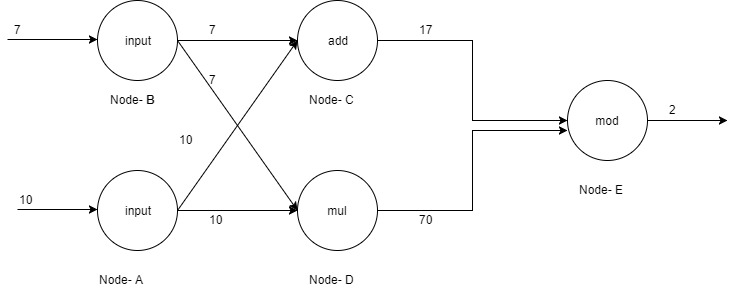
The graph above helps understand the basics of tensorflow.The graph has two input nodes(ie. node-A and node-B) where two different constant values(ie. 7 and 10) are passed. The values are passed to intermediary nodes(ie. node-C and node-D). Node-C performs addition operation on input values while node-D performs multipilcation. The values from both the nodes(C and D) are passed down to node-E where modulus operation takes place and the output is presented
Now, lets describe the different components of the graph.
- **Nodes:**They are typically drawn as circles, ovals, or boxes, represent some sort of computation or action being done on or with data in the graph’s context. In the above example, the operation “add” is the sole node.

- **Edges/Tensors:**They are the actual values that get passed to and from Operations, and are typically drawn as arrows. In the “add” example, the inputs 1 and 2 are both edges leading into the node, while the output 3 is an edge leading out of the node. Conceptually, we can think of edges as the link between different Operations as they carry information from one node to the next. The central unit of data in TensorFlow is the tensor. A tensor consists of a set of primitive values shaped into an array of any number of dimensions. A tensor's rank is its number of dimensions. Here are some examples of tensors:

- 3 # a rank 0 tensor; this is a scalar with shape []
- [1. ,2., 3.] # a rank 1 tensor; this is a vector with shape [3]
- [[1., 2., 3.], [4., 5., 6.]] # a rank 2 tensor; a matrix with shape [2, 3]

For more about Tensor Ranks, Shapes, and Types: https://www.tensorflow.org/programmers_guide/dims_types

In [2]:
#Importing TensorFlow
#This gives Python access to all of TensorFlow's classes, methods, and symbols
import tensorflow as tf

In [3]:
#Now transform the graph above to a tensorflow model. 
#Define the nodes first

node_a = tf.constant(7.0, name='input_a')
node_b = tf.constant(10.0, name='input_b')
node_c = tf.add(node_a,node_b, name='add_c')
node_d = tf.multiply(node_a,node_b, name='mul_d')
node_e = tf.mod(node_d,node_c, name='mod_e')

Datatype here is by default float32. it can be changed by explicitly as an argument while creating node. Check the tensorflow documentation for details about the arguments.
- Tensorflow documentation : https://www.tensorflow.org/api_docs/python/
- Goto this link for more math functions : https://www.tensorflow.org/api_guides/python/math_ops

In [4]:
print(node_a, node_e)

Tensor("input_a:0", shape=(), dtype=float32) Tensor("mod_e:0", shape=(), dtype=float32)


Notice that printing the nodes does not output the values 7.0 and 2.0 as you might expect. Instead, they are nodes that, when evaluated, would produce 7.0 and 2.0, respectively. To actually evaluate the nodes, we must run the computational graph within a session. A session encapsulates the control and state of the TensorFlow runtime.
The following code creates a Session object and then invokes its run method to run enough of the computational graph to evaluate node-A and node-E. By running the computational graph in a session as follows:

In [5]:
sess = tf.Session()
sess.run([node_a, node_e])

[7.0, 2.0]

In [6]:
#you can also run a single node
sess.run(node_c)

17.0

In [7]:
#you can also assign a node output to a variable
output = sess.run(node_d)
output

70.0

We can aslo visualize the graph to confirm that if it’s structured the same way we drew it out. To do that, we use **TensorBoard**. But first, we are creating a TensorFlow **FileWriter** object, and assigning it to the variable **write**. This command creates a folder named **graph** alongside the python file we've written and the summary is placed inside that folder.

In [8]:
writer = tf.summary.FileWriter ( './graph' , sess.graph)

Go to your terminal and type in the following command:
- **tensorboard --logdir="graph"**

Make sure that your present working directory is thesame as where you ran your Python code. Then, open your browser and go to http://localhost:6006/ (or the link you get back after running tensorboard command). The screenshot of the graphical interface and graphs are shown below.
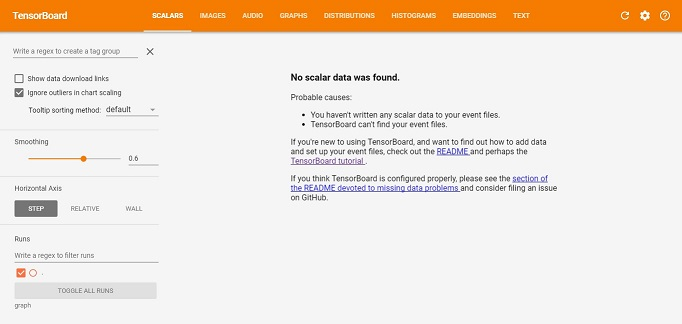 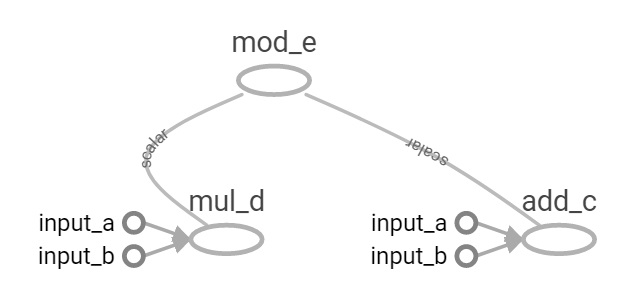
Though the graph doesn't look exactly like the graph we previously drew, its the same. The inputs(A and B) to the multipication and addition blocks are just duplicated in this version.


In [9]:
#Once you are done constructing your graph, its a good habit to close the Session and FileWriter
writer.close()
sess.close()

To avoid having to close session everytime, you can define them in a **with** block. So after running the **with** block, the session will automatically close

In [10]:
with tf.Session() as sess:
    output = sess.run(node_d)
    print(output)
    #writer can also be defined within this session as follows
    #writer = tf.summary.FileWriter ( './graph' , sess.graph)

70.0


## Multidimensional array in Tensorflow(Rank and shape of a Tensor)
TensorFlow programs use a tensor data structure to represent all data. You can think of a TensorFlow tensor as an n-dimensional array or list. A tensor has a static type and dynamic dimensions. Only tensors may be passed between nodes in the computation graph.

### Tensor Rank
In the TensorFlow system, tensors are described by a unit of dimensionality known as rank. Tensor rank is not the same as matrix rank. Tensor rank (sometimes referred to as order or degree or n-dimension) is the number of dimensions of the tensor.For example, the following tensor (defined as a Python list) has a rank of 2:
- t = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

A rank two tensor is what we typically think of as a matrix, a rank one tensor is a vector. For a rank two tensor you can access any element with the syntax t[i, j]. For a rank three tensor you would need to address an element with t[i, j, k].
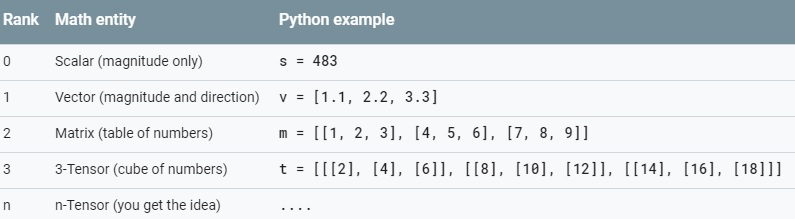

### Tensor Shape
The TensorFlow documentation uses three notational conventions to describe tensor dimensionality: rank, shape, and dimension number. The following table shows how these relate to one another:
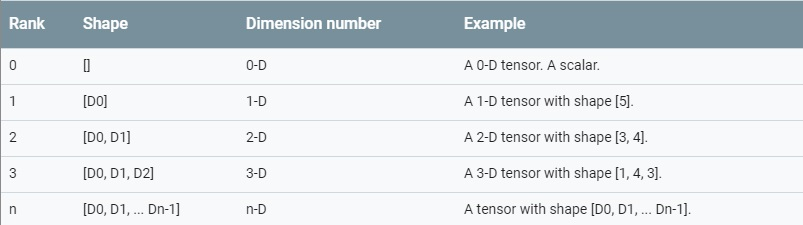

Now, lets try and code different tensors in Tensorflow

In [11]:
scalar = tf.constant([1])
vector = tf.constant([1,2,3,4])
matrix = tf.constant([[1,2,3],[4,5,6],[7,8,9]])
tensor = tf.constant([[[1,2,3],[4,5,6],[7,8,9]], [[4,2,7],[1,9,3],[2,4,5]], [[9,2,8],[3,7,1],[0,5,6]]])    
with tf.Session() as sess:
    result = sess.run(scalar)
    print('Scalar(0-D tensor) \n', result)
    result = sess.run(vector)
    print('Vector(1-D tensor with shape [3]) \n', result)
    result = sess.run(matrix)
    print('Matrix(2-D tensor with shape [3,3] ie.3*3 matrix) \n', result)
    result = sess.run(tensor)
    print('Tensor(3-D tensor with shape [3,3,3]) \n', result)

Scalar(0-D tensor) 
 [1]
Vector(1-D tensor with shape [3]) 
 [1 2 3 4]
Matrix(2-D tensor with shape [3,3] ie.3*3 matrix) 
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
Tensor(3-D tensor with shape [3,3,3]) 
 [[[1 2 3]
  [4 5 6]
  [7 8 9]]

 [[4 2 7]
  [1 9 3]
  [2 4 5]]

 [[9 2 8]
  [3 7 1]
  [0 5 6]]]


## Variables & Placeholders
A graph can be parameterized to accept external inputs, known as placeholders. A placeholder is a promise to provide a value later.

In [12]:
a = tf.placeholder(dtype='float32')
# instead of dtype='float32', you can write tf.float32
b = tf.placeholder(tf.float32) 
adder_node = a + b  # + provides a shortcut for tf.add(a, b)

In [13]:
with tf.Session() as sess:
    print(sess.run(adder_node, {a: 10, b:2.1}))
    print(sess.run(adder_node, {a: [1,3.5], b: [9, 5]}))
    print(sess.run(adder_node, {a: [[1,2,3],[4,5,6],[7,8,9]], b: [[9,2,8],[3,7,1],[0,5,6]]}))    

12.1
[ 10.    8.5]
[[ 10.   4.  11.]
 [  7.  12.   7.]
 [  7.  13.  15.]]


The computational graph can be made more complex by adding another operation.           

In [14]:
add_and_double = adder_node*2
with tf.Session() as sess:
    print(sess.run(add_and_double, {a: 10, b:2.1}))
    print(sess.run(add_and_double, {a: [1,3.5], b: [9, 5]}))
    print(sess.run(add_and_double, {a: [[1,2,3],[4,5,6],[7,8,9]], b: [[9,2,8],[3,7,1],[0,5,6]]}))

24.2
[ 20.  17.]
[[ 20.   8.  22.]
 [ 14.  24.  14.]
 [ 14.  26.  30.]]


In machine learning we typically want a model that can take arbitrary inputs, such as the one above. To make the model trainable, we need to be able to modify the graph to get new outputs with the same input. Variables allow us to add trainable parameters to a graph. They are constructed with a type and initial value as follows:

In [22]:
A = tf.Variable([-1], dtype=tf.float32, name='A')
b = tf.Variable([1], dtype=tf.float32, name='b')
x = tf.placeholder(tf.float32, name='x')
linear_model = A * x + b

Constants are initialized when you call **tf.constant**, and their value can never change. On the contrary, variables are not initialized when you call **tf.Variable**. To initialize all the variables in a TensorFlow program, you must explicitly call a special operation as follows:

In [16]:
init = tf.global_variables_initializer()

It is important to realize **init** is a handle to the TensorFlow sub-graph that initializes all the global variables. Therefore,until we call **sess.run**, the variables are uninitialized.

Since **x** is a placeholder, we can evaluate **linear_model** for several values of **x** simultaneously as follows:

In [17]:
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(linear_model, {x:[-2,-1,1,2]}))

[ 3.  2.  0. -1.]


We've created a model(ie.**linear_model**) but we still dont know how good the model is yet. So, to evaluate a model based on training datasets, we need to know the desired values. Lets provide desired values as **y** placeholder.

We also need to write a loss function for the model. A loss function measures how far apart the current model is from the provided data. We'll use a standard model for linear regression, which sums the square of the errors between the current model and provided model.(ie. **linear_model-y**).

We use **tf.square** to square the error and **tf.reduce_sum** to add all the squared errors to create a single scalar

In [18]:
y = tf.placeholder(tf.float32)
squared_errors = tf.square(linear_model - y)
loss = tf.reduce_sum(squared_errors)
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(loss, {x:[-2,-1,1,2], y:[-6,-4,0,2]}))

126.0


We could improve loss value manually by reassigning the values of **A** and **b** to values of **2** and **-2**. A variable is initialized to the value provided to **tf.Variable** but can be changed using operations like **tf.assign**. For example, **A=2** and **b=-2** are the optimal parameters for our model. We can change **W** and **b** accordingly:

In [19]:
fixA = tf.assign(A, [2.])
fixb = tf.assign(b, [-2.])
with tf.Session() as sess:
    sess.run([fixA, fixb])  
    print(sess.run(loss, {x:[-2,-1,1,2], y:[-6,-4,0,2]}))

0.0


We guessed the perfect values of A and b, but the whole idea of machine learning is to find the correct model parameters automatically without having to guess manually. We shall learn to accomplish this in the comming section.

## Optimizers to find correct model parameters
Optimiers slowly change each variable(in this case **A** and **b**) in order to minimize **Loss Function**. There are lots of optimizers for our use, but the simplest optimizer is **Gradient Descent**. It modifies each variable according to the magnitude of the derivative of loss with respect to that variable. TensorFlow can automatically produce derivatives given only a description of the model using the function **tf.train.GradientDescentOptimizer()**. A example is shown below to demonstrate how a optimizer works.

Note: If you want to get familiar with theoretical part of Gradient Descent and how it works, you can find a lot of materials in the internet and some useful videos in Youtube.

wiki link: https://en.wikipedia.org/wiki/Gradient_descent

In [20]:
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

In [21]:
with tf.Session() as sess:
    sess.run(init)    #reset the values of A and b to the previous incorrect values
    for _ in range(100):
        print(sess.run(train,{x:[-2,-1,1,2], y:[-6,-4,0,2]}))
        print(sess.run([A,b]))

None
[array([-0.40000004], dtype=float32), array([ 0.75999999], dtype=float32)]
None
[array([ 0.07999995], dtype=float32), array([ 0.53920001], dtype=float32)]
None
[array([ 0.46399996], dtype=float32), array([ 0.33606404], dtype=float32)]
None
[array([ 0.77119994], dtype=float32), array([ 0.14917894], dtype=float32)]
None
[array([ 1.01695991], dtype=float32), array([-0.02275538], dtype=float32)]
None
[array([ 1.21356797], dtype=float32), array([-0.18093495], dtype=float32)]
None
[array([ 1.37085438], dtype=float32), array([-0.32646015], dtype=float32)]
None
[array([ 1.49668348], dtype=float32), array([-0.46034336], dtype=float32)]
None
[array([ 1.59734678], dtype=float32), array([-0.58351588], dtype=float32)]
None
[array([ 1.67787743], dtype=float32), array([-0.69683462], dtype=float32)]
None
[array([ 1.74230194], dtype=float32), array([-0.80108786], dtype=float32)]
None
[array([ 1.7938416], dtype=float32), array([-0.89700085], dtype=float32)]
None
[array([ 1.83507323], dtype=float32)

In the outputs above, we see that the values of **A** and **b** are getting closer to the ideal values where the **Loss Function** is minimum. After each iteration, the values of **A** and **b** improves and gets closer to **2** and **-2**.